In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import keras

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print("We have total", len(training_images), "images for training")
print("with", len(training_labels), "labels for each image")

We have total 60000 images for training
with 60000 labels for each image


In [6]:
print("We have taken", len(test_images), "images to test our model")
print("with", len(test_labels), "its labels for each image")

We have taken 10000 images to test our model
with 10000 its labels for each image


In [7]:
print('training_images: ' + str(training_images.shape))
print('training_labels: ' + str(training_labels.shape))
print('test_images:  '  + str(test_images.shape))
print('test_labels:  '  + str(test_labels.shape))

training_images: (60000, 28, 28)
training_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


In [8]:
training_images=training_images.reshape(60000, 28, 28, 1)  # CNN takes i/p in 3*3 format
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

### CNN Model consisting of: 2-Hidden layers, 1 flatten and 2 dense layer(1 for i/p and 1 for o/p) along with tanh and softplus AF

In [9]:
model = tf.keras.models.Sequential([# Convolution1
                                    tf.keras.layers.Conv2D(32, (3,3), activation='tanh', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Convolution2
                                    tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flattening the o/p
                                    tf.keras.layers.Flatten(),
                                    # 128 dense layers, and 10 output layers
                                    tf.keras.layers.Dense(128, activation='tanh'),
                                    tf.keras.layers.Dense(10, activation='softplus')
                                    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Stochastic Gradient Descent Optimizer with Sparse categorical Crossentropy Loss function

In [11]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(training_images, training_labels, batch_size=256, epochs=20, validation_split=.15)

Epoch 1/20
200/200 [==============================] - 20s 98ms/step - loss: 1.8623 - accuracy: 0.5037 - val_loss: 1.3622 - val_accuracy: 0.6718
Epoch 2/20
200/200 [==============================] - 21s 106ms/step - loss: 1.1486 - accuracy: 0.6818 - val_loss: 0.9917 - val_accuracy: 0.7041
Epoch 3/20
200/200 [==============================] - 21s 106ms/step - loss: 0.9179 - accuracy: 0.7123 - val_loss: 0.8454 - val_accuracy: 0.7222
Epoch 4/20
200/200 [==============================] - 21s 105ms/step - loss: 0.8015 - accuracy: 0.7341 - val_loss: 0.7558 - val_accuracy: 0.7460
Epoch 5/20
200/200 [==============================] - 21s 105ms/step - loss: 0.7299 - accuracy: 0.7485 - val_loss: 0.6969 - val_accuracy: 0.7557
Epoch 6/20
200/200 [==============================] - 21s 107ms/step - loss: 0.6816 - accuracy: 0.7594 - val_loss: 0.6592 - val_accuracy: 0.7602
Epoch 7/20
200/200 [==============================] - 21s 107ms/step - loss: 0.6464 - accuracy: 0.7689 - val_loss: 0.6284 - val_acc

In [13]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48884740471839905
Test accuracy: 0.8198999762535095


In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

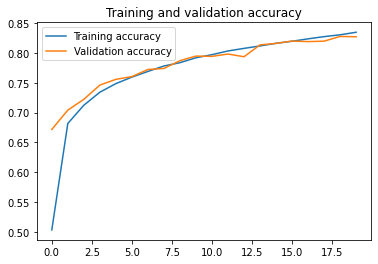

In [15]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

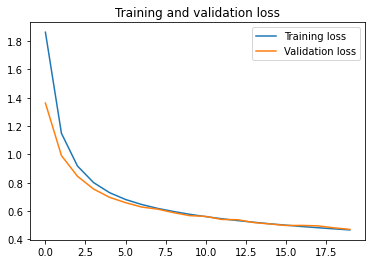

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

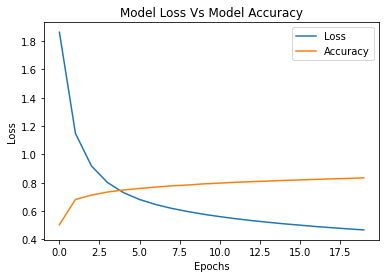

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss Vs Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [28]:
predictions = model.predict(test_images)
print("Predicted Probabilities -\n",predictions[5])
pred_labels = np.argmax(predictions,axis=1)
print("\nPredicted Class [Highest Prob] -",pred_labels[:4])

Predicted Probabilities -
 [3.0335502e-03 9.3931890e-01 4.1871890e-04 7.9062267e-04 9.6138427e-03
 1.8663815e-04 1.3430235e-03 3.0508323e-04 2.7558755e-04 1.7732804e-05]

Predicted Class [Highest Prob] - [9 2 1 1]


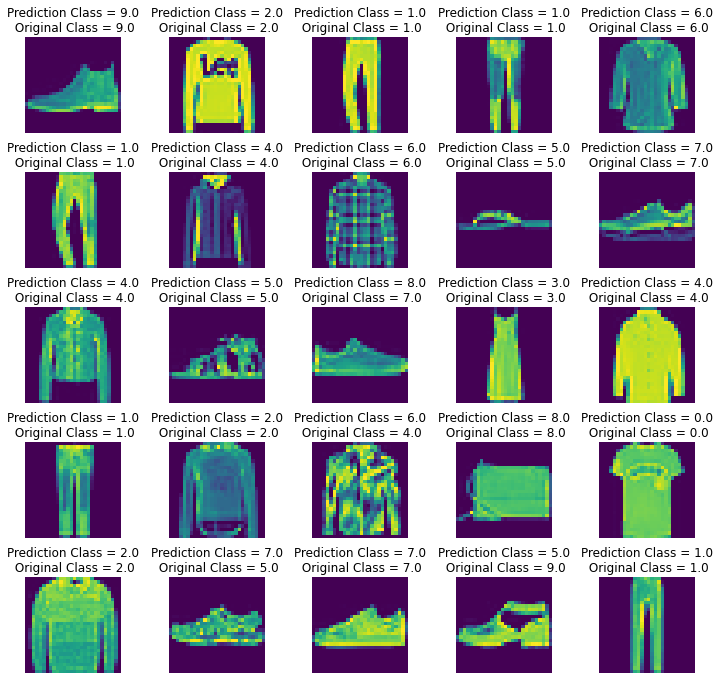

In [29]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {pred_labels[i]:0.1f}\n Original Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)
cm

array([[813,   2,  39,  60,   9,   5,  56,   0,  16,   0],
       [  1, 944,   5,  35,   8,   0,   5,   0,   2,   0],
       [ 13,   1, 760,   8, 169,   1,  37,   0,  11,   0],
       [ 25,  12,  37, 846,  52,   0,  24,   0,   4,   0],
       [  1,   2, 107,  33, 801,   0,  49,   0,   7,   0],
       [  0,   0,   0,   3,   0, 929,   0,  41,   5,  22],
       [207,   1, 202,  38, 202,   1, 319,   0,  30,   0],
       [  0,   0,   0,   0,   0,  37,   0, 888,   1,  74],
       [  0,   2,  18,   5,   7,   5,  12,   4, 945,   2],
       [  0,   0,   0,   0,   0,  10,   0,  35,   1, 954]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_labels) * 100

81.99

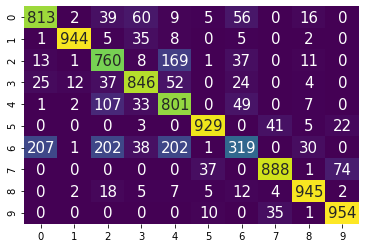

In [36]:
import seaborn as sns

sns.heatmap(cm, annot=True, annot_kws={"size": 15}, fmt='g', cbar=False, cmap="viridis")
plt.show()